In [1]:
from src.pispec import PiSpec
from src.trace_utils import TraceParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import time
from itertools import product
import re
import datetime


# initialize the interface0 v
pispec = PiSpec()
print(pispec.tracecontroller.device)
# TODO: this should be in config files


# alternate the datapoints between two detectors? 
# Thats a tracecontroller things

# the tracecontroller is broken

# pispec.tracecontroller._debug()



waiting for serial... 0.000501997709274292
../pi-spec-cli/mycreds.json
credentials authorized
creds saved to mycreds.json
/dev/ttyACM1


In [2]:
# pispec.actinic_test(int_values=[10, 50, 100, 200])

In [3]:
# pispec.meas_led_test()

In [4]:
# for i in range(0, 100):
#     pispec.run_experiment(exp_name="node", wavelengths=['830'], act_phase_vals=[0, 0, 0], btwn_trace_delay=1)
#     print(i)

## Experiment Test

In [5]:
exp_name = "filtercombo1_545"
wavelengths = ["545","830", "940"]
act_phase_vals = [0, 200, 0]

values = ["zero_val", "val", "raw_diff", "V", "d_abs"]

pispec.run_experiment(exp_name=exp_name, wavelengths=wavelengths, act_phase_vals=act_phase_vals)


running experiment with the following wavelengths: ['545', '830', '940']
os.path.exists: /home/pi/projects/pi-spec-cli/export/221019_filtercombo1_545, True
../pi-spec-cli/mycreds.json
credentials authorized
creds saved to mycreds.json
runtrace says dest path is : /home/pi/projects/pi-spec-cli/export/221019_filtercombo1_545
counter=1001,numAq=6,numPreAq=3,power_state=0, sat_pulse_begin=600, sat_pulse_end=400, pulse_length=85, pulse_interval=1000, meas_led_vis=3, meas_led_ir=0, num_points=1000, pulse_mode=1, act_int_phase=[0|200|0], trigger_delay=45;

counter=1001,numAq=6,numPreAq=3,power_state=0, sat_pulse_begin=600, sat_pulse_end=400, pulse_length=85, pulse_interval=1000, meas_led_vis=7, meas_led_ir=0, num_points=1000, pulse_mode=1, act_int_phase=[0|200|0], trigger_delay=45;

counter=1001,numAq=6,numPreAq=3,power_state=0, sat_pulse_begin=600, sat_pulse_end=400, pulse_length=85, pulse_interval=1000, meas_led_vis=8, meas_led_ir=0, num_points=1000, pulse_mode=1, act_int_phase=[0|200|0], t

## peek at dataframe

In [6]:



df = pispec.get_df().dropna()

print(df.head())
print(df.tail())

  rep trace_num   trace_begun     trace_end  \
0   0         0  1.666225e+09  1.666225e+09   
1   0         0  1.666225e+09  1.666225e+09   
2   0         0  1.666225e+09  1.666225e+09   
3   0         0  1.666225e+09  1.666225e+09   
4   0         0  1.666225e+09  1.666225e+09   

                                        param_string note       created  \
0  e45;i1000;j0;n1000;p85;r0;s400;t600;v2;w0;x200...       1.666225e+09   
1  e45;i1000;j0;n1000;p85;r0;s400;t600;v2;w0;x200...       1.666225e+09   
2  e45;i1000;j0;n1000;p85;r0;s400;t600;v2;w0;x200...       1.666225e+09   
3  e45;i1000;j0;n1000;p85;r0;s400;t600;v2;w0;x200...       1.666225e+09   
4  e45;i1000;j0;n1000;p85;r0;s400;t600;v2;w0;x200...       1.666225e+09   

  pt_num  time_us  paq_0  ...  aq_3  aq_4  aq_5   val   zero_val   raw_diff  \
0      0      1.0   76.0  ...  45.0  22.0   0.0  61.8  40.666667  21.133333   
1      1   1002.0  169.0  ...   0.0  36.0  44.0  32.8  71.000000 -38.200000   
2      2   2003.0   79.0  ...

In [7]:
pispec.dest_path

'/home/pi/projects/pi-spec-cli/export/221019_filtercombo1_545'

In [8]:

# for bug in pispec.datahandler.debug_list:
    # print(bug)

# export/221014_4layerKimwipe/221014_1410_4layerKimwipe.csv

In [9]:
# def get_led_num(df, type: str = 'v'):
#     pattern = f"{type}[0-9]"
#     buf = df.loc[5, "param_string"].tolist()[0]

#     nm = re.search(pattern, buf )
#     print(pattern, buf, nm)

# get_led_num(df, 'v')
# get_led_num(df, 'r')


In [10]:

dest = pispec.save_df(df)
print(dest)

saving to /home/pi/projects/pi-spec-cli/export/221019_filtercombo1_545
/home/pi/projects/pi-spec-cli/export/221019_filtercombo1_545/221019_1709_filtercombo1_545.csv


## Plot the data

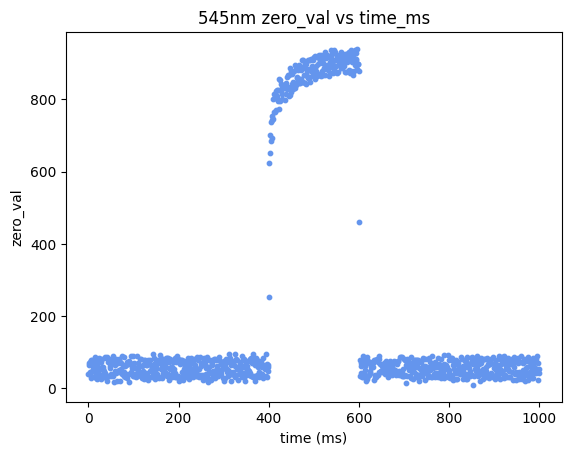

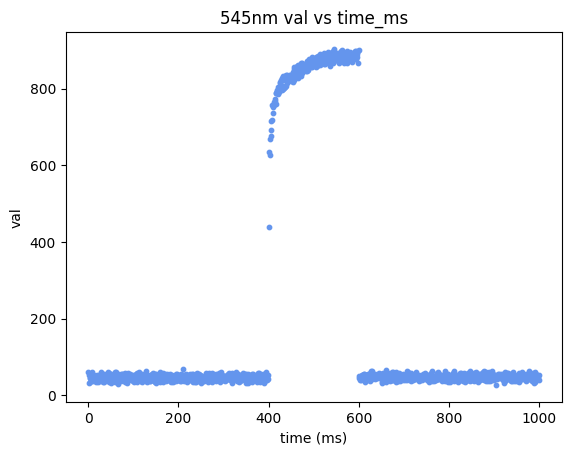

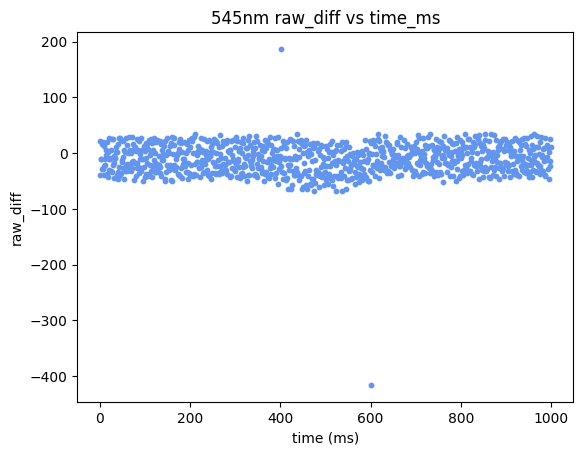

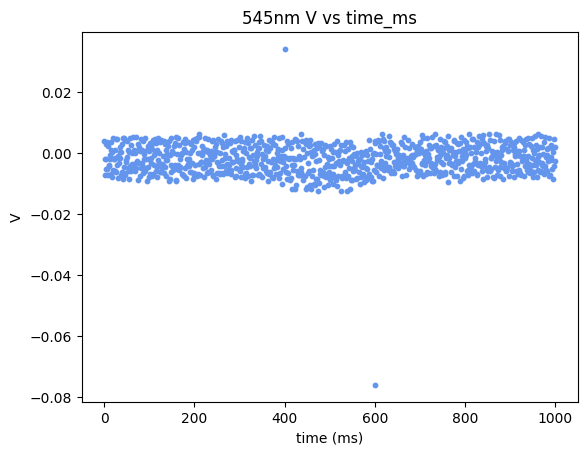

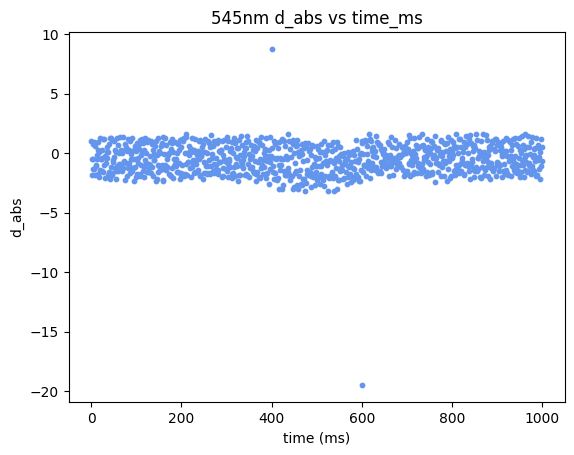

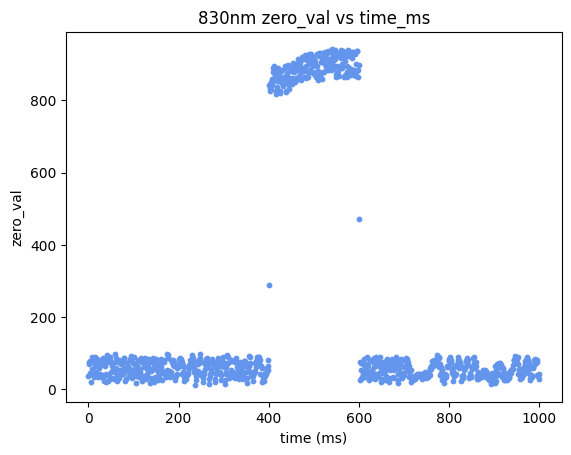

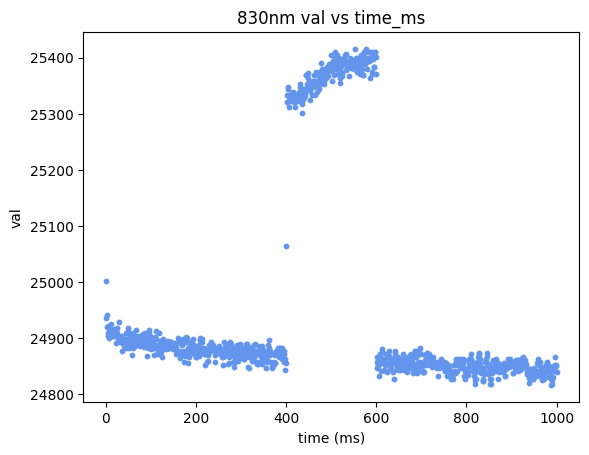

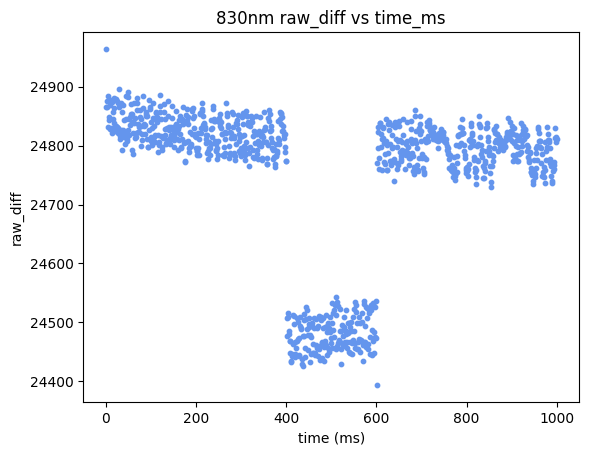

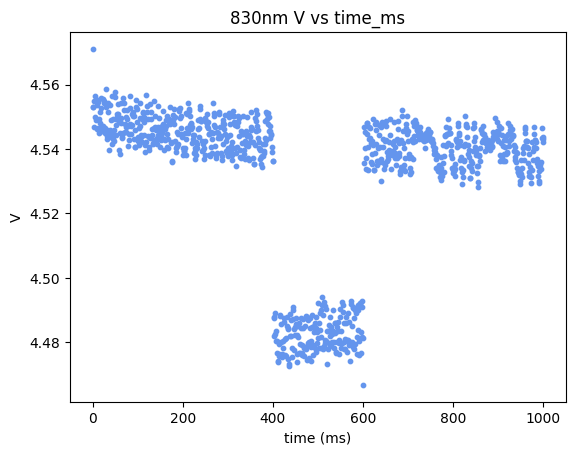

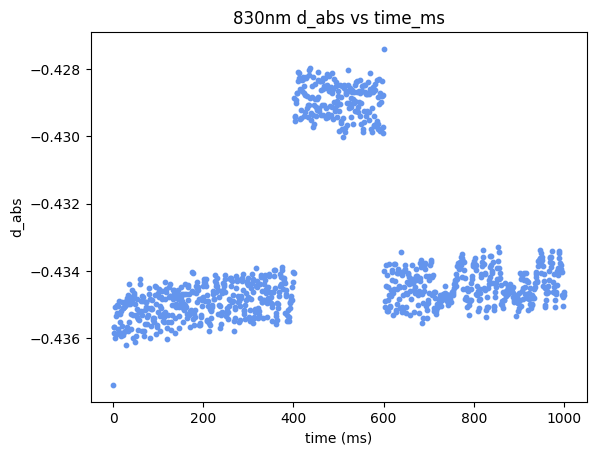

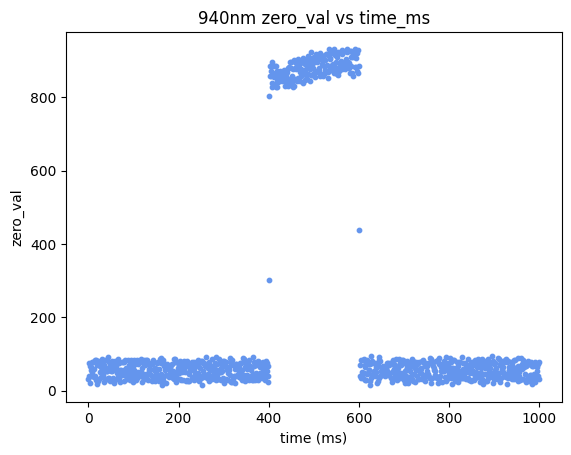

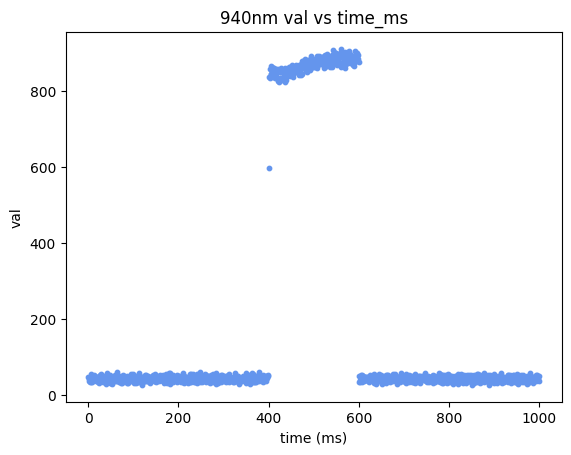

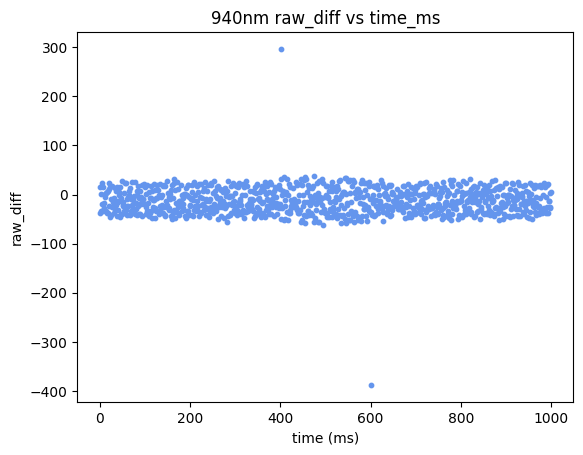

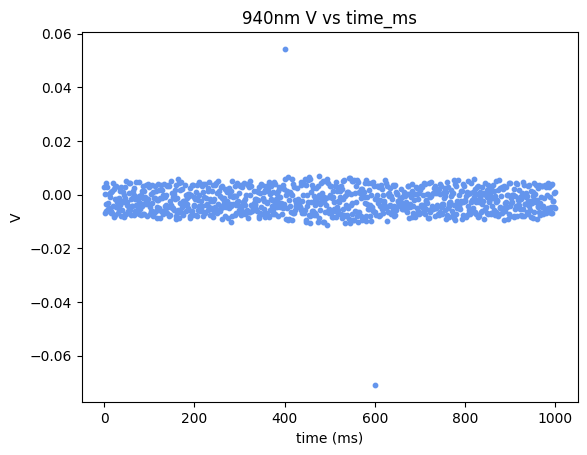

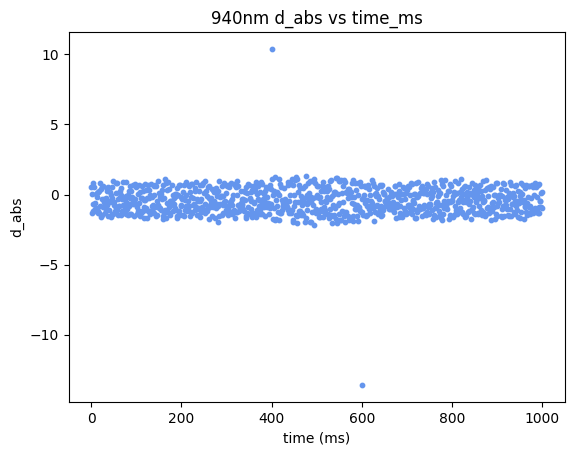

In [11]:
for c in product(wavelengths,values):
    nm, col = c
    pispec.plot_df(df=df, nm=nm, col=col, upload=True)





from 100-190, relative signal
before saturation pulse
delat transmission, change relative to the pre sat pulse transmission

deltaT / T

T = pre saturation pulse

THEN 

dA = (- deltaT/T)/2.3


In [ ]:
# import re

# resp = re.findall(pattern="v[0-9]", string=df.param_string[0])
# print(resp)

# divide 

In [ ]:
# # row means of all the data points
# df["val"] = df[['aq_0', 'aq_1', 'aq_2', 'aq_3', 'aq_4']].mean(numeric_only = True, axis=1)

# df["V"] = df["val"] / 6535


In [ ]:
# plt.plot(df['time_us'], df['V'])
# plt.ylim(0, 10)
# plt.show()

In [ ]:
# (x='time_us', y='val')
# plt.show()

# plt.plot(df['time_us'], df['aq_0'])
# plt.show()

In [ ]:

# pispec.tracecontroller.modify_actinic(intensity=500)
# time.sleep(5)
